Link to access my blog:
https://avalei.medium.com/exploratory-data-analysis-on-twitch-95bddefd1b76

In [3]:
#imports
#run this cell first before running each cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression

In [4]:
data = pd. read_csv("https://drive.google.com/uc?export=download&id=1OZdr1-DCFmHZiqV1fu3U2p93kPIEqpLJ") #imports twitch data in csv file form
frame = pd.DataFrame(data) #changes it into dataframe
frame.head() #checks the heads

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [5]:
frame.shape #understands the shape of the dataframe

(1000, 11)

In [6]:
frame.info() #checks for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


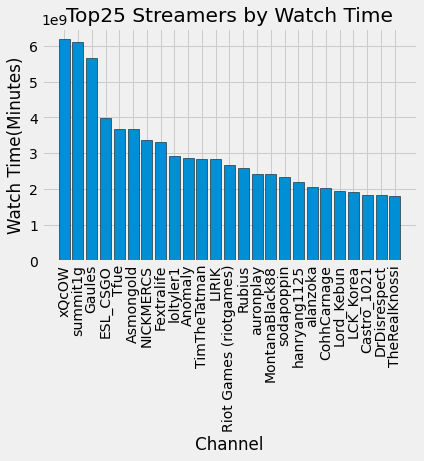

In [7]:
plt.style.use('fivethirtyeight') #choose style
frame_sortedW = frame.sort_values(by=['Watch time(Minutes)'],ascending=False) #sort dataframe and desired series(watch time)
channel_sortedW = frame_sortedW['Channel'][:25] #get the top 25 channels by watch time and their corresponding watch time
watchTime_sorted = frame_sortedW['Watch time(Minutes)'][:25]
plt.bar(channel_sortedW, watchTime_sorted, color='#008fd5', edgecolor='black') #bar plot customization
plt.tick_params('x', labelrotation = 90)
plt.xlabel('Channel')
plt.ylabel('Watch Time(Minutes)')
plt.title('Top25 Streamers by Watch Time')
plt.show()

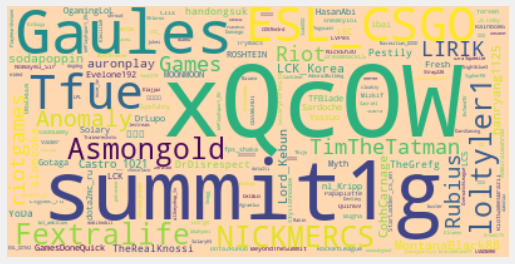

In [8]:
frame_sortedW = frame.sort_values(by=['Watch time(Minutes)'],ascending=False) #sort dataframe
plt.subplots(figsize=(8,7))
wc = WordCloud(background_color='#fed8b1', max_words=1000,max_font_size=80) #create a word cloud
wc.generate(" ".join(frame_sortedW['Channel'].tolist())) #must be string in generate()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

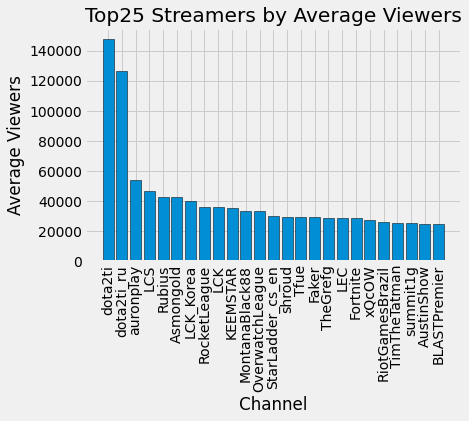

In [9]:
plt.style.use('fivethirtyeight') #choose style
frame_sortedA = frame.sort_values(by=['Average viewers'],ascending=False) #sort dataframe and desired series(average viewers)
channel_sortedA = frame_sortedA['Channel'][:25] #get the top 25 channels by average viewers and their corresponding average viewers
avgViewers_sorted = frame_sortedA['Average viewers'][:25]
plt.bar(channel_sortedA, avgViewers_sorted, color='#008fd5', edgecolor='black') #bar plot customization
plt.tick_params('x', labelrotation = 90)
plt.xlabel('Channel')
plt.ylabel('Average Viewers')
plt.title('Top25 Streamers by Average Viewers')
plt.show()

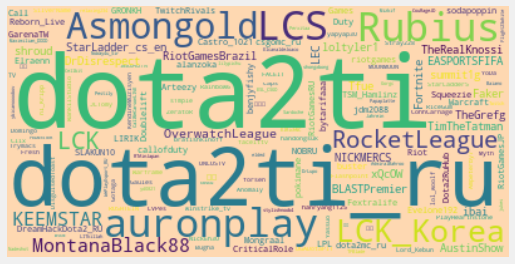

In [10]:
frame_sortedA = frame.sort_values(by=['Average viewers'],ascending=False) #sort dataframe
plt.subplots(figsize=(8,7))
wc = WordCloud(background_color='#fed8b1', max_words=1000,max_font_size=80) #create a word cloud
wc.generate(" ".join(frame_sortedA['Channel'].tolist())) #must be string in generate()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
frame.corr().round(2) #create the correlation table

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.00,0.15,0.58,0.48,0.62,0.51,0.53,0.04,-0.04
Stream time(minutes),0.15,1.00,-0.12,-0.25,-0.09,-0.16,0.06,-0.01,0.04
Peak viewers,0.58,-0.12,1.00,0.68,0.53,0.47,0.30,0.03,-0.08
Average viewers,0.48,-0.25,0.68,1.00,0.43,0.42,0.25,-0.01,-0.08
Followers,0.62,-0.09,0.53,0.43,1.00,0.72,0.28,0.04,-0.09
Followers gained,0.51,-0.16,0.47,0.42,0.72,1.00,0.24,0.03,-0.09
Views gained,0.53,0.06,0.30,0.25,0.28,0.24,1.00,-0.04,-0.09
Partnered,0.04,-0.01,0.03,-0.01,0.04,0.03,-0.04,1.00,0.00
Mature,-0.04,0.04,-0.08,-0.08,-0.09,-0.09,-0.09,0.00,1.00


Text(0.5, 1.0, 'Correlation Matrix for Twitch Data')

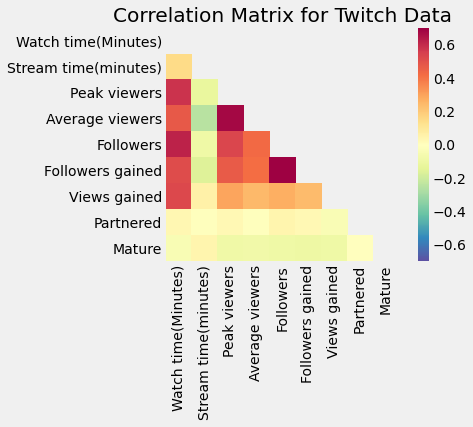

In [12]:
corrs = frame.corr()
mask = np.zeros_like(corrs) #set mask for correlation matrix
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-0.7, vmax=0.7) #heatmap customization
plt.title('Correlation Matrix for Twitch Data')

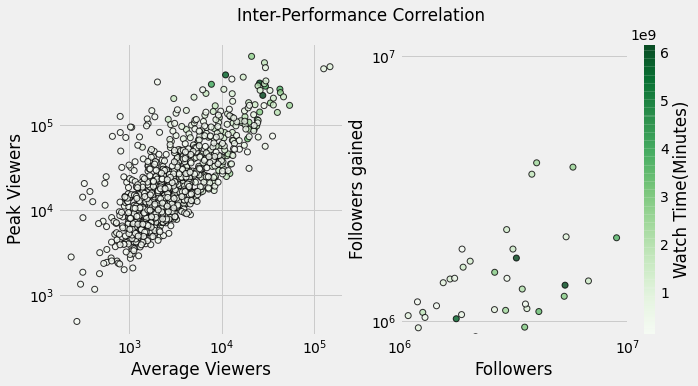

In [13]:
peakViewers = frame['Peak viewers'] #get desired series from the dataframe
avgViewers = frame['Average viewers']
watchTime = frame['Watch time(Minutes)']
fig, axs = plt.subplots(1,2,figsize=(10,5)) #create the subplot with 1 row and 2 columns
fig.suptitle('Inter-Performance Correlation')
viewers = axs[0].scatter(frame['Average viewers'], frame['Peak viewers'], c=frame['Watch time(Minutes)'], cmap='Greens', edgecolor='black', linewidth=1, alpha=0.8)
axs[0].set_xscale('log') #change the scale to log to reduce outliers
axs[0].set_yscale('log')
axs[0].set_xlabel('Average Viewers') #scatter plot customization
axs[0].set_ylabel('Peak Viewers')
followers = axs[1].scatter(frame['Followers'], frame['Followers gained'], c=frame['Watch time(Minutes)'], cmap='Greens', edgecolor='black', linewidth=1, alpha=0.8)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim(10**6, 10**7) #make the spread look nicer 
axs[1].set_xlabel('Followers')
axs[1].set_ylabel('Followers gained')
cbar = fig.colorbar(viewers) #set color bar
cbar.set_label('Watch Time(Minutes)')

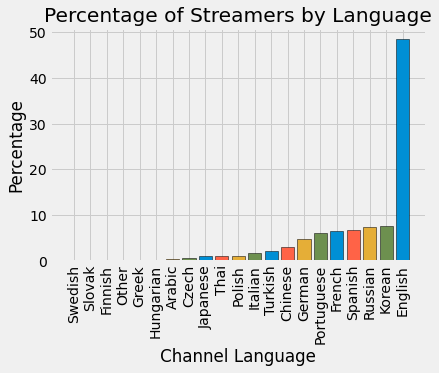

In [14]:
plt.style.use('fivethirtyeight') #choose style
languageGroup = frame.groupby(by='Language').agg('count') #group dataframe by language and count channels number in each language
channelsByLanguage_sorted = languageGroup[[languageGroup.columns[0]]].sort_values(by=['Channel'],ascending=True)
language = channelsByLanguage_sorted.index.tolist()
languageShare = (channelsByLanguage_sorted['Channel']/1000)*100 #percentage of certain language
colors = ['#008fd5','#FF6347','#e5ae37','#6d904f'] 
plt.bar(language, languageShare, color=colors, edgecolor='black') #bar plot customization
plt.tick_params('x', labelrotation = 90)
plt.xlabel('Channel Language')
plt.ylabel('Percentage')
plt.title('Percentage of Streamers by Language')
plt.show()

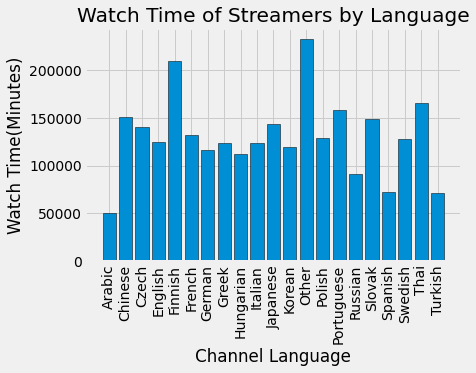

In [15]:
plt.style.use('fivethirtyeight') #choose style
languageSum = frame.groupby('Language').sum() #sums each column up with dataframe grouped by language
languageGroup = frame.groupby(by='Language').agg('count')
channelsByLanguage = languageGroup[[languageGroup.columns[0]]]
watchTimeByLanguage = languageSum[languageSum.columns[1]]/channelsByLanguage[channelsByLanguage.columns[0]]
language = channelsByLanguage.index.tolist() #get language as a list
plt.bar(language, watchTimeByLanguage, color='#008fd5', edgecolor='black') #bar plot customization
plt.tick_params('x', labelrotation = 90)
plt.xlabel('Channel Language')
plt.ylabel('Watch Time(Minutes)')
plt.title('Watch Time of Streamers by Language')
plt.show()

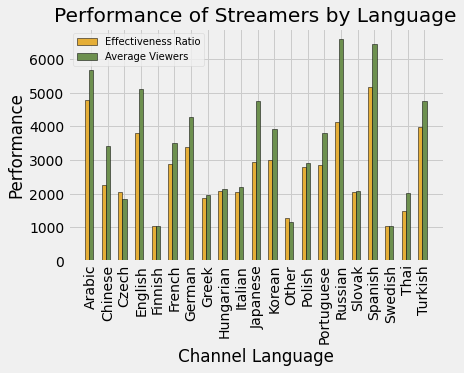

In [16]:
plt.style.use('fivethirtyeight') #choose style
languageSum = frame.groupby('Language').sum() #variables from previous cells (have them here just in case the system lost connection and avoid running everything all over again)
languageGroup = frame.groupby(by='Language').agg('count')
channelsByLanguage = languageGroup[[languageGroup.columns[0]]]
effRatioL = languageSum[languageSum.columns[0]]/languageSum[languageSum.columns[1]] #define effective ratio as the quotient of divding watch time to stream time
avgViewersByLanguage = languageSum[languageSum.columns[3]]/channelsByLanguage[channelsByLanguage.columns[0]]
language = channelsByLanguage.index.tolist()
x_indexes = np.arange(len(language)) #necessary for creating a side-by-side bar plot
width = 0.25
plt.bar(x_indexes-width, effRatioL, width=width, color='#e5ae37', edgecolor='black', label='Effectiveness Ratio') #side-by-side bar plot customization
plt.bar(x_indexes, avgViewersByLanguage, width=width, color='#6d904f', edgecolor='black', label='Average Viewers')
plt.legend(fontsize=10, loc='best')
plt.xticks(ticks=x_indexes, labels=language)
plt.tick_params('x', labelrotation = 90)
plt.title('Performance of Streamers by Language')
plt.xlabel('Channel Language')
plt.ylabel('Performance')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


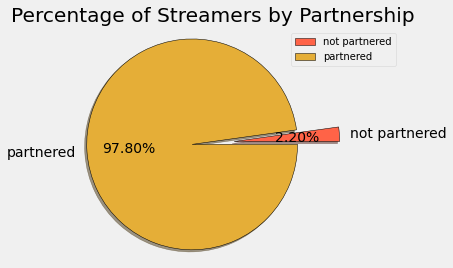

In [17]:
plt.style.use('fivethirtyeight') #choose style
partneredGroup = frame.groupby(by='Partnered').agg('count') #sums each column up with dataframe grouped by partnership
partneredShare = partneredGroup[[partneredGroup.columns[0]]]
partnered = partneredShare.index.tolist()
for n, i in enumerate(partnered): #change T/F notations to words
  if i == True:
    partnered[n] = 'partnered'
  else:
    partnered[n] = 'not partnered'
colors = ['#FF6347','#e5ae37']
plt.pie(partneredShare, labels=partnered, autopct='%.2f%%', explode=[0,0.4], colors=colors, shadow=True, wedgeprops={'edgecolor': 'black'}) #pie chart customization
plt.title('Percentage of Streamers by Partnership')
plt.axis('equal')
plt.legend(partnered, fontsize=10, loc='best')
plt.show()

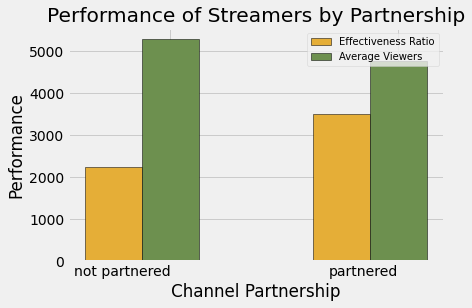

In [18]:
plt.style.use('fivethirtyeight')  #choose style
partneredSum = frame.groupby('Partnered').sum() #variables from previous cells (have them here just in case the system lost connection and avoid running everything all over again)
effRatioP = partneredSum[partneredSum.columns[0]]/partneredSum[partneredSum.columns[1]] #define effective ratio as the quotient of divding watch time to stream time
partneredGroup = frame.groupby(by='Partnered').agg('count')
partneredShare = partneredGroup[[partneredGroup.columns[0]]]
avgViewersByPartnered = partneredSum[partneredSum.columns[3]]/partneredShare[partneredShare.columns[0]]
partnered = partneredShare.index.tolist()
for n, i in enumerate(partnered): #change T/F notations to words
  if i == True:
    partnered[n] = 'partnered'
  else:
    partnered[n] = 'not partnered'
x_indexes = np.arange(len(partnered)) #necessary for creating a side-by-side bar plot
width = 0.25
plt.bar(x_indexes-width, effRatioP, width=width, color='#e5ae37', edgecolor='black', label='Effectiveness Ratio') #side-by-side bar plot customization
plt.bar(x_indexes, avgViewersByPartnered, width=width, color='#6d904f', edgecolor='black', label='Average Viewers')
plt.legend(fontsize=10, loc='best')
plt.xticks(ticks=x_indexes, labels=partnered, ha='right')
plt.title('Performance of Streamers by Partnership')
plt.xlabel('Channel Partnership')
plt.ylabel('Performance')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


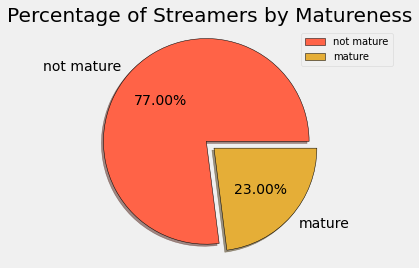

In [22]:
plt.style.use('fivethirtyeight') #choose style
matureGroup = frame.groupby(by='Mature').agg('count') #sums each column up with dataframe grouped by matureness
matureShare = matureGroup[[matureGroup.columns[0]]]
mature = matureShare.index.tolist()
for n, i in enumerate(mature): #change T/F notations to words
  if i == True:
    mature[n] = 'mature'
  else:
    mature[n] = 'not mature'
matureShare = matureGroup[[matureGroup.columns[0]]]
colors = ['#FF6347','#e5ae37']
plt.pie(matureShare, labels=mature, autopct='%.2f%%', explode=[0,0.1], colors=colors, shadow=True, wedgeprops={'edgecolor': 'black'}) #pie chart customization
plt.title('Percentage of Streamers by Matureness')
plt.axis('equal')
plt.legend(mature, fontsize=10, loc='best')
plt.show()

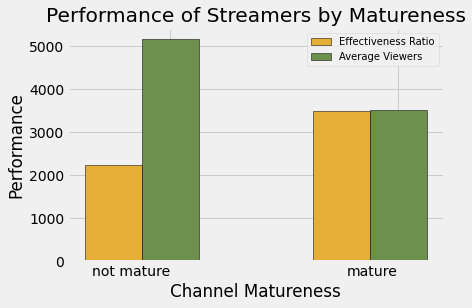

In [20]:
plt.style.use('fivethirtyeight') #choose style
matureSum = frame.groupby('Mature').sum() #variables from previous cells (have them here just in case the system lost connection and avoid running everything all over again)
effRatioM = matureSum[matureSum.columns[0]]/matureSum[matureSum.columns[1]] #define effective ratio as the quotient of divding watch time to stream time
matureGroup = frame.groupby(by='Mature').agg('count')
matureShare = matureGroup[[matureGroup.columns[0]]]
avgViewersByMature = matureSum[matureSum.columns[3]]/matureShare[matureShare.columns[0]]
mature = matureShare.index.tolist()
for n, i in enumerate(mature): #change T/F notations to words
  if i == True:
    mature[n] = 'mature'
  else:
    mature[n] = 'not mature'
x_indexes = np.arange(len(mature)) #necessary for creating a side-by-side bar plot
width = 0.25
plt.bar(x_indexes-width, effRatioP, width=width, color='#e5ae37', edgecolor='black', label='Effectiveness Ratio') #side-by-side bar plot customization
plt.bar(x_indexes, avgViewersByMature, width=width, color='#6d904f', edgecolor='black', label='Average Viewers')
plt.legend(fontsize=10, loc='best')
plt.xticks(ticks=x_indexes, labels=mature, ha='right')
plt.title('Performance of Streamers by Matureness')
plt.xlabel('Channel Matureness')
plt.ylabel('Performance')
plt.show()

coefficient: 0.3023924477378341
intercept: 33138.48903457032


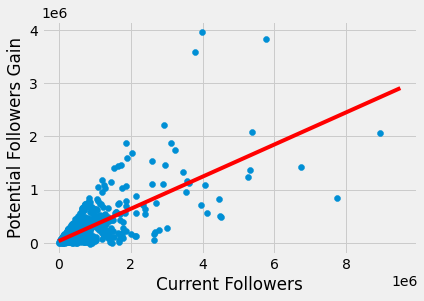

In [23]:
x=frame['Followers'].to_numpy() #get desired series from dataframe and change the type to numpy array
X = x[:, np.newaxis] #increases dimension
y=frame['Followers gained'].to_numpy()
model = LinearRegression(fit_intercept=True)
model.fit(X, y) #fit the model
print("coefficient: " + str(float(model.coef_)))
print("intercept: " + str(float(model.intercept_)))
xfit = np.linspace(-1, 9.5*10**6, num=50) #prediction for other data
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.xlabel("Current Followers")
plt.ylabel("Potential Followers Gain")
plt.plot(xfit, yfit, color='r')
plt.show()